# Task 1

# TASK 1A: EXPLORATORY DATA ANALYSIS

In [88]:
import pandas as pd
import numpy as np
import re
import random
import string
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('./data/ODI-adapted2.csv', sep=';')

In [90]:
df = df.rename(columns={'Tijdstempel': 'send_date', 'What programme are you in?': 'program', 'Have you taken a course on machine learning?': 
                        'taken_machine_learning_course', 'Have you taken a course on information retrieval?': 'taken_information_retrieval_course', 
                        'Have you taken a course on statistics?': 'taken_statistics_course', 'Have you taken a course on databases?': 
                        'taken_database_course', 'What is your gender?': 'gender', 'I have used ChatGPT to help me with some of my study assignments ': 
                        'have_used_chatgpt', 'When is your birthday (date)?': 'birthdate', 'How many students do you estimate there are in the room?':
                        'students_in_the_room_gamble', 'Did you stand up to come to your previous answer    ?': 'stood_up', 'Give a random number': 'random_number', 
                        'What is your stress level (0-100)?':'stresslevel', 'How many hours per week do you do sports (in whole hours)? ': 'hours_of_sports_week', 
                        'Time you went to bed Yesterday': 'time_to_bed', 'What makes a good day for you (1)?': 'good_day_1', 'What makes a good day for you (2)?': 
                        'good_day_2'})
df.columns

Index(['send_date', 'program', 'taken_machine_learning_course',
       'taken_information_retrieval_course', 'taken_statistics_course',
       'taken_database_course', 'gender', 'have_used_chatgpt', 'birthdate',
       'students_in_the_room_gamble', 'stood_up', 'stresslevel',
       'hours_of_sports_week', 'random_number', 'time_to_bed', 'good_day_1',
       'good_day_2'],
      dtype='object')

In [91]:
pd.set_option('display.max_columns', None)
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,gender,have_used_chatgpt,birthdate,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,good_day_1,good_day_2
0,4-4-2023 12:08:33,Masters - AI,yes,0,mu,nee,gender fluid,yes,23/11/1997,319,unknown,100,0,69,11:30,Ashes,Not ashes
1,4-4-2023 12:08:36,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600,no,60,2,42,23:00,good food,good sleep
2,4-4-2023 12:08:38,AI,no,0,mu,nee,female,no,21/09,220,no,20,5,17,23:30,Sports,Friends
3,4-4-2023 12:08:52,Data mining,yes,1,mu,ja,male,yes,25-06-1996,100,unknown,50,5,12,23:00,Gym,Piano
4,4-4-2023 12:08:59,Quantitative Risk Management,no,0,mu,nee,male,yes,18-08-1998,300,no,65,10,874,23:00,Relax,Sun


In [92]:
# Print how many rows/columns there are
df.shape

(305, 17)

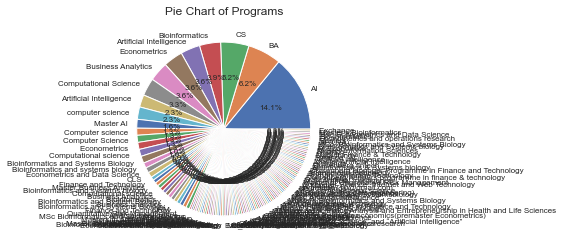

In [93]:
# count the number of occurrences of each program in the program column
program_counts = df['program'].value_counts()

# create a pie chart of the program counts with smaller labels
plt.pie(program_counts, labels=program_counts.index, autopct='%1.1f%%', textprops={'fontsize': 8})

# add title
plt.title('Pie Chart of Programs')

# show the plot
plt.show()

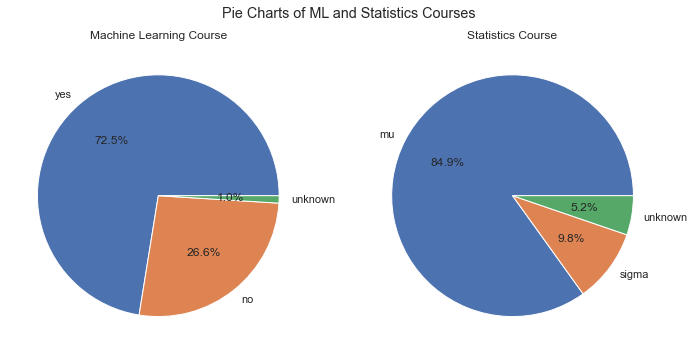

In [94]:
# create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the pie chart of the taken_machine_learning_course column in the left subplot
ml_counts = df['taken_machine_learning_course'].value_counts()
axs[0].pie(ml_counts, labels=ml_counts.index, autopct='%1.1f%%')
axs[0].set_title('Machine Learning Course')

# plot the pie chart of the taken_statistics_course column in the right subplot
stats_counts = df['taken_statistics_course'].value_counts()
axs[1].pie(stats_counts, labels=stats_counts.index, autopct='%1.1f%%')
axs[1].set_title('Statistics Course')

# add overall title to the plot
fig.suptitle('Pie Charts of ML and Statistics Courses')

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

In [95]:
# create a regular expression pattern to match all values referring to AI
pattern1 = r'(.*Artificial Intelligence.*|.*AI.*|.*Ai.*|.*Artificial.*|.*Artifscial Intelligense.*)'
pattern2 = r'(.*CS.*|.*Computer Science.*|.*Computer science.*|.*Masters cs.*|.*computer science.*)'
pattern3 = r'(.*Bioinformatics.*|.*Systems Biology.*|.*Bio-informatics.*|.*bioinformatics.*|.*Bionformatics.*)'
pattern16 = r'(.*operations research.*|.*& Operations Research.*)'
pattern4 = r'(.*Econometrics(?! and Operations Research).*|.*Econometrics MSc.*)'
pattern5 = r'(.*Business Analytics.*|.*Master Business Analytics.*|.*BA.*|.*business analytics.*|.*Business analytics.*)'
pattern6 = r'(.*PhD.*)'
pattern7 = r'(.*Biomedical Sciences.*|.*Biomedical sciences.*)'
pattern8 = r'(.*Human Language Technology.*)'
pattern9 = r'(.*computational.*|.*Computational Science.*|.*Computational.*)'
pattern10 = r'(.*Information Sciences.*)'
pattern11 = r'(.*Human language.*)'
pattern12 = r'(.*Finance and Technology.*|.*finance and technology.*|.*Finance & Technology.*|.*fintech.*|.*FinTech.*|.*finance & technology.*)'
pattern13 = r'(.*Finance.*|.*Economics.*)'
pattern14 = r'(.*Digital Business and Innovation.*)'
pattern15 = r'(.*Quantitative Risk Management.*|.*QRM.*)'
pattern17 = r'(.*exchange.*|.*Exchange.*)'

# replace all values matching the pattern with "AI" in the program column
df['program'].replace(pattern1, 'Artificial Intelligence', regex=True, inplace=True)
df['program'].replace(pattern2, 'Computer Science', regex=True, inplace=True)
df['program'].replace(pattern3, 'Bioinformatics and Systems Biology', regex=True, inplace=True)
df['program'].replace(pattern16, 'Econometrics and Operations Research', regex=True, inplace=True)
df['program'].replace(pattern4, 'Econometrics', regex=True, inplace=True)
df['program'].replace(pattern5, 'Business Analytics', regex=True, inplace=True)
df['program'].replace(pattern6, 'PhD', regex=True, inplace=True)
df['program'].replace(pattern7, 'Biomedical Sciences', regex=True, inplace=True)
df['program'].replace(pattern8, 'Human Language Technology', regex=True, inplace=True)
df['program'].replace(pattern9, 'Computational Science', regex=True, inplace=True)
df['program'].replace(pattern10, 'Information Sciences', regex=True, inplace=True)
df['program'].replace(pattern11, 'Human Language Technology', regex=True, inplace=True)
df['program'].replace(pattern12, 'Finance and Technology', regex=True, inplace=True)
df['program'].replace(pattern13, 'Finance', regex=True, inplace=True)
df['program'].replace(pattern14, 'Digital Business and Innovation', regex=True, inplace=True)
df['program'].replace(pattern15, 'Quantitative Risk Management', regex=True, inplace=True)
df['program'].replace(pattern17, 'Exchange', regex=True, inplace=True)

In [96]:
# Plot unique values for programs 
len(df['program'].unique())

28

In [97]:
# List of unwanted values
unwanted_values = ['aryamaan710@gmail.com', '116', 'CLS', 'Exchange', 'Hyperbolic Time Chamber', 'High school 3rd grade', 'Data thingy']

# Replace unwanted values with NaN
df['program'] = df['program'].replace(unwanted_values, np.nan)

In [98]:
#Get the three most frequent values in the column
top_three_values = df['program'].value_counts().head(3).index.tolist()

# Replace NaN values with random choice among the top three values
df['program'] = df['program'].fillna(pd.Series(np.random.choice(top_three_values, size=len(df['program'].index))))

In [99]:
# Plot unique values for programs 
df['program'].unique()

array(['Artificial Intelligence', 'Data mining',
       'Quantitative Risk Management', 'Business Analytics',
       'Computational Science', 'Computer Science',
       'Bioinformatics and Systems Biology', 'Neuroscience', 'Finance',
       'Econometrics', 'Human Language Technology',
       'Econometrics and Operations Research', 'Masters',
       'Information Sciences', 'Biomedical Sciences',
       'Management, Policy Analysis and Entrepreneurship in Health and Life Sciences',
       'Econometrics and Operations Research ',
       'Digital Business and Innovation', 'PhD',
       'Stochastics and financial mathematics', 'Big data engineering '],
      dtype=object)

In [100]:
df['program'].value_counts()

Artificial Intelligence                                                         90
Bioinformatics and Systems Biology                                              56
Business Analytics                                                              41
Computer Science                                                                36
Econometrics                                                                    25
Computational Science                                                           20
Finance                                                                         14
Quantitative Risk Management                                                     5
Econometrics and Operations Research                                             3
Human Language Technology                                                        3
PhD                                                                              2
Data mining                                                                      1
Neur

# TASK 1B: DATA CLEANING


- dropping rows with course count < 5 for simplifying analysis in future

In [101]:
# Set the minimum group size
min_group_size = 6
group_sizes = df.groupby('program')['program'].transform('size')

# Use boolean indexing to select rows where the group size is at least the minimum
df = df[group_sizes >= min_group_size]

df['program'].value_counts()


Artificial Intelligence               90
Bioinformatics and Systems Biology    56
Business Analytics                    41
Computer Science                      36
Econometrics                          25
Computational Science                 20
Finance                               14
Name: program, dtype: int64

Clean the student gamble column

In [102]:
df['students_in_the_room_gamble'] = pd.to_numeric(df['students_in_the_room_gamble'], errors='coerce')
# df['students_in_the_room_gamble'] = df['students_in_the_room_gamble'].astype('Int64')


In [103]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['students_in_the_room_gamble'] - np.nanmean(df['students_in_the_room_gamble'])) / np.nanstd(df['students_in_the_room_gamble']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['students_in_the_room_gamble'][z_scores > threshold] = np.mean(df['students_in_the_room_gamble'])

<ipython-input-103-97c73970e26e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['students_in_the_room_gamble'][z_scores > threshold] = np.mean(df['students_in_the_room_gamble'])


In [104]:
# calculate the mean value of the 'students_in_the_room_gamble' column
mean_value = np.mean(df['students_in_the_room_gamble'])

# replace NaN values with the mean value
df['students_in_the_room_gamble'] = df['students_in_the_room_gamble'].fillna(mean_value)

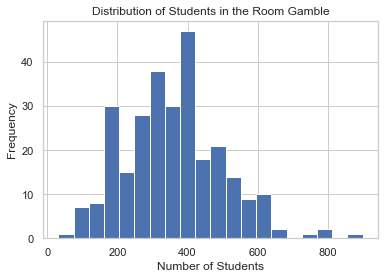

In [105]:
# plot the 'students_in_the_room_gamble' column
plt.hist(df['students_in_the_room_gamble'], bins=20)
plt.title('Distribution of Students in the Room Gamble')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')
plt.show()

Clean the stress level column

In [106]:
df['stresslevel'] = pd.to_numeric(df['stresslevel'], errors='coerce')


In [107]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['stresslevel'] - np.mean(df['stresslevel'])) / np.std(df['stresslevel']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['stresslevel'][z_scores > threshold] = np.mean(df['stresslevel'])

<ipython-input-107-7bf2f5051753>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stresslevel'][z_scores > threshold] = np.mean(df['stresslevel'])


In [108]:
# set a range of 0 to 100 for the stresslevel, and replace outliers with the median (mean was outside of max and min due to outliers)
min_value = 0
max_value = 100

median_value = np.median(df['stresslevel'])

replace_value = min_value if median_value < min_value else max_value if median_value > max_value else median_value
df['stresslevel'] = np.where((df['stresslevel'] < min_value) | (df['stresslevel'] > max_value), replace_value, df['stresslevel'])

In [109]:
# replace NaN values with a random value between 0 and 100
df['stresslevel'] = df['stresslevel'].apply(lambda x: np.random.randint(0, 101) if pd.isna(x) else x)

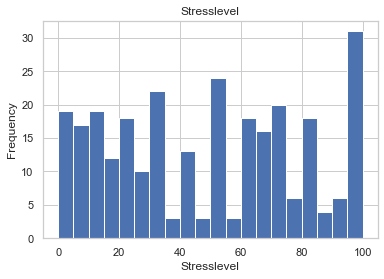

In [110]:
plt.hist(df['stresslevel'], bins=20)
plt.title('Stresslevel')
plt.xlabel('Stresslevel')
plt.ylabel('Frequency')
plt.show()

Clean the amount of hours per week of sports column

In [111]:
df['hours_of_sports_week'] = pd.to_numeric(df['hours_of_sports_week'], errors='coerce')


In [112]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['hours_of_sports_week'] - np.mean(df['hours_of_sports_week'])) / np.std(df['hours_of_sports_week']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['hours_of_sports_week'][z_scores > threshold] = np.mean(df['hours_of_sports_week'])

<ipython-input-112-71beb3ff3687>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_of_sports_week'][z_scores > threshold] = np.mean(df['hours_of_sports_week'])


In [113]:
# calculate the mean value of the 'students_in_the_room_gamble' column
mean_value = np.mean(df['hours_of_sports_week'])

# replace NaN values with the mean value
df['hours_of_sports_week'] = df['hours_of_sports_week'].fillna(mean_value)

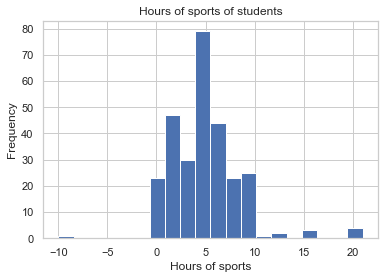

In [114]:
# plot the 'students_in_the_room_gamble' column
plt.hist(df['hours_of_sports_week'], bins=20)
plt.title('Hours of sports of students')
plt.xlabel('Hours of sports')
plt.ylabel('Frequency')
plt.show()

Cleaning the time to bed column

In [115]:
# print(np.asarray(df['time_to_bed']))

In [116]:
try:
  df['time_to_bed'] = pd.to_datetime(df['time_to_bed'], format='%H:%M').dt.time
except:
  pass

In [117]:
time_pattern = r"^(0?[0-9]|1[0-9]|2[0-3]):[0-5][0-9]$"

valid_times = [time for time in df['time_to_bed'] if re.match(time_pattern, time)]
mean_time = pd.Series(valid_times).apply(lambda x: pd.to_datetime(x, format='%H:%M')).mean().strftime('%H:%M')

# Replace each value that does not match the pattern with the mean time value
df['time_to_bed'] = df['time_to_bed'].apply(lambda x: mean_time if not re.match(time_pattern, x) else x)


<AxesSubplot:xlabel='hour_of_time_to_bed', ylabel='count'>

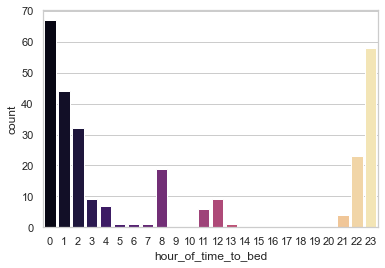

In [118]:
df['hour_of_time_to_bed'] = df['time_to_bed'].apply(lambda x: int(x.split(":")[0]))
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
sns.countplot(data=df, x='hour_of_time_to_bed', order=hour_order,palette='magma')

Cleaning the date of birth column, extracting the year of birth to a new column

In [119]:
df['year_of_birth'] = df['birthdate'].str.extract(r'(\d{4})')
df['year_of_birth'].unique()

array(['1997', '1995', nan, '2000', '1999', '1996', '0000', '1998',
       '2002', '2001', '3311', '1900', '1994', '1985', '1992', '1987',
       '1990', '1220', '1993', '1405', '2017', '0001', '1981'],
      dtype=object)

Clean the good_day_1 and good_day_2 column of punctuation marks for further analysis 

In [120]:
def _remove_punctuation(x):
    # Remove punctuation marks (excluding whitespace) using regular expressions
    clean_text = re.sub(rf"[{string.punctuation}]","", str(x))
    return clean_text

df['good_day_1'] = df['good_day_1'].apply(_remove_punctuation)
df['good_day_2'] = df['good_day_2'].apply(_remove_punctuation)

# TASK 1C: FEATURE ENGINEERING

Creating age column

In [121]:
def _extract_age(x):
    try:
        return 2023 - int(x)
    except:
        return 0

df['age'] = df['year_of_birth'].apply(_extract_age)


In [122]:
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,gender,have_used_chatgpt,birthdate,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,good_day_1,good_day_2,hour_of_time_to_bed,year_of_birth,age
0,4-4-2023 12:08:33,Artificial Intelligence,yes,0,mu,nee,gender fluid,yes,23/11/1997,319.0,unknown,100.0,0.0,69,11:30,Ashes,Not ashes,11,1997,26
1,4-4-2023 12:08:36,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600.0,no,60.0,2.0,42,23:00,good food,good sleep,23,1995,28
2,4-4-2023 12:08:38,Artificial Intelligence,no,0,mu,nee,female,no,21/09,220.0,no,20.0,5.0,17,23:30,Sports,Friends,23,NaN,0
5,4-4-2023 12:08:59,Business Analytics,yes,0,mu,ja,female,yes,13-03-2000,500.0,no,80.0,5.0,13,00:00,Coffee,Sunny weather,0,2000,23
6,4-4-2023 12:09:02,Artificial Intelligence,yes,0,mu,ja,male,yes,1999-07-21,150.0,no,100.0,7.0,27,23:00,Good code,Good code,23,1999,24


In [123]:
# convert the 'year_of_birth' column to numerical format
df['year_of_birth'] = pd.to_numeric(df['year_of_birth'], errors='coerce')

In [124]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['year_of_birth'] - np.mean(df['year_of_birth'])) / np.std(df['year_of_birth']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['year_of_birth'][z_scores > threshold] = np.median(df['year_of_birth'])

<ipython-input-124-71e06739244d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_birth'][z_scores > threshold] = np.median(df['year_of_birth'])


In [125]:
# fill missing values with the mean value of the column
median_birth_year = int(df['year_of_birth'].median())
# Choose median, because mean was 

In [126]:
df['year_of_birth'] = df['year_of_birth'].fillna(median_birth_year)

Analysing the good_day_1 and 2 column , to examine the possible general category 

In [127]:
len(df['good_day_1'].unique())

196

In [40]:
df['good_day_1'].unique()

array(['Ashes', 'good food', 'Sports', 'Coffee', 'Good code',
       'When the sun shines', 'Expierence ', 'You', 'delicious food',
       'Netflix and', 'Something surprising emerging', 'Coffee ', 'Sun',
       'Sunny weather', 'Thursday ', 'Sunshine', 'Getting things done',
       'No task', 'eat well', 'The sun', 'Good food', 'Eating chocolate',
       'Being productive ', 'food ', 'Good night rest', 'Family ',
       'blue skies', 'Good weather', 'sunny days', 'Slept well',
       'Friends', 'A sunny day ', 'Sunny', 'Feeling productive',
       'No obligations', 'good morning routine', 'Family',
       'Good weather ', 'food', 'bread', 'Sticking to my timetable ',
       'The sun ', 'Working out', 'Nice weather', 'Good results',
       'coffee', 'No class', 'Good breakfast',
       'A day where I went to the gym', 'Food', 'Vacation', 'Good meal',
       'Music', 'Good food ', 'No lecture', 'Holiday ',
       'Having some free time for once', 'work done', 'well fed',
       'Lekker 

In [41]:
import nltk
# run below only once to download the wordnet if not present on system
# nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer


In [42]:
# In this example, we use the WordNet ontology to find synsets (sets of synonyms) for each word in the group of words. 
# We then check each lemma (a specific word form) in each synset to see if it matches any of the related terms for each hobby category. 
# We keep a count of how many matches each category has, and choose the category with the most matches as the predicted category.

# Preprocess the group of words to be classified
# words_to_classify = "I love making lasagna"
# preprocessed_words = [word.lower() for word in words_to_classify.split()]

def _extract_category(x):
    try:
        # The keys in below dictionary is a generic categorical aspect of life to which the text entered by user in the good day column is mapped
        # The values are list of words that are mapped to the category
        generic_category = {
            "weather": ["warm", "weather", "sunny", "skies", "sun", "air", "sunset"],
            "socializing" : ["friend","sex", "family", "people", "love", "person", "socializing", "gossiping", "company", "relationship", "you", "alone", "cat", "dog"],
            "food" : ["meal", "coffee", "tea", "food", "breakfast", "bread", "eat", "oatmeal","snacks", "pizza", "lunch", "cake", "cook", "bake", "grill"],
            "drinking": ["wine", "beer",  "drink","alcohol"],
            "vacation": ["holiday", "free time", "leisure", "vacation", "weekend", "friday", "saturday", "sunday"],
            "relaxation" : ["sleep", "sleeping", "nap", "rest", "relax", "experience", "no", "stress","fun", "mood", "nothing", "chill", "free"],
            "entertainment" : ["tv", "netflix", "music", "cricket", "ashes", "video", "game","movie", "reading", "read", "paint", "draw", "sketch"], 
            "productivity" :["work", "done","productive", "code", "morning", "routine", "timetable", "results", "winning", "progress", "grade", "money", "successful", "productivity"],
            "physical_exercise" : ["yoga", "football", "gym","sports", "active", "workout", "bike", "hike", "travel"]
        }

        x = x.strip()
        preprocessed_words = [word.lower() for word in x.split()]


        # Map the preprocessed words to a category using the WordNet ontology
        category_counts = {}
        for word in preprocessed_words:
            # get all the synonyms for the word from wordnet
            synsets = wn.synsets(word)
            for synset in synsets:
                # for each lemma / root form of sysnonmy check if it exists in the list corresponding to each generic_category key
                for lemma in synset.lemmas():
                    for category, related_terms in generic_category.items():
                        if lemma.name() in related_terms:
                            category_counts[category] = category_counts.get(category, 0) + 1

        # Choose the hobby category with the most matches
        predicted_category = max(category_counts, key=category_counts.get)
        return predicted_category
    except:
        return "NA"

In [43]:
df['good_things_1'] = df['good_day_1'].apply(_extract_category)
df['good_things_2'] = df['good_day_2'].apply(_extract_category)

In [44]:
df[['stresslevel', 'good_things_1','good_things_2']]

,stresslevel,good_things_1,good_things_2
0,100.0,NA,NA
1,60.0,food,relaxation
2,20.0,relaxation,socializing
5,80.0,food,weather
6,100.0,productivity,productivity
...,...,...,...
300,70.0,productivity,productivity
301,10.0,socializing,NA
302,58.0,relaxation,NA
303,50.0,productivity,socializing


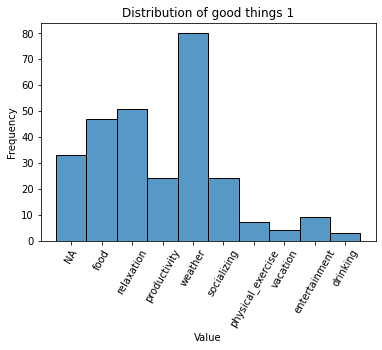

In [45]:
# Create a frequency plot
sns.histplot(data = df['good_things_1'], kde=False)

# Set plot title and axis labels
plt.title('Distribution of good things 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

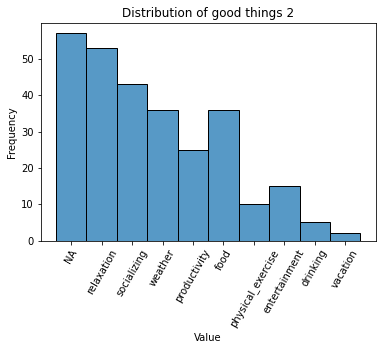

In [46]:
# Create a frequency plot
sns.histplot(data = df['good_things_2'], kde=False)

# Set plot title and axis labels
plt.title('Distribution of good things 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

Replace NA values for the good_things columns

In [47]:
'''Replace NA values for good_things_1'''
df['good_things_1'] = df['good_things_1'].replace('NA', np.nan)

# find the frequency of each category in the column
freq_dict = df['good_things_1'].value_counts(normalize=True).to_dict()

# remove NaN from the dictionary
freq_dict = {k:v for k,v in freq_dict.items() if not pd.isna(k)}

# find the top 3 categories
top_categories = sorted(freq_dict, key=freq_dict.get, reverse=True)[:3]

# randomly choose one of the top 3 categories for each NaN value
df['good_things_1'] = df['good_things_1'].apply(lambda x: random.choice(top_categories) if pd.isna(x) else x)

In [48]:
'''Replace NA values for good_things_2'''
df['good_things_2'] = df['good_things_2'].replace('NA', np.nan)

# find the frequency of each category in the column
freq_dict = df['good_things_2'].value_counts(normalize=True).to_dict()

# remove NaN from the dictionary
freq_dict = {k:v for k,v in freq_dict.items() if not pd.isna(k)}

# find the top 3 categories
top_categories = sorted(freq_dict, key=freq_dict.get, reverse=True)[:3]

# randomly choose one of the top 3 categories for each NaN value
df['good_things_2'] = df['good_things_2'].apply(lambda x: random.choice(top_categories) if pd.isna(x) else x)

In [49]:
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,gender,have_used_chatgpt,birthdate,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,good_day_1,good_day_2,hour_of_time_to_bed,year_of_birth,age,good_things_1,good_things_2
0,4-4-2023 12:08:33,Artificial Intelligence,yes,0,mu,nee,gender fluid,yes,23/11/1997,319.0,unknown,100.0,0.0,69,11:30,Ashes,Not ashes,11,1997.0,26,food,weather
1,4-4-2023 12:08:36,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600.0,no,60.0,2.0,42,23:00,good food,good sleep,23,1995.0,28,food,relaxation
2,4-4-2023 12:08:38,Artificial Intelligence,no,0,mu,nee,female,no,21/09,220.0,no,20.0,5.0,17,23:30,Sports,Friends,23,1999.0,0,relaxation,socializing
5,4-4-2023 12:08:59,Business Analytics,yes,0,mu,ja,female,yes,13-03-2000,500.0,no,80.0,5.0,13,00:00,Coffee,Sunny weather,0,2000.0,23,food,weather
6,4-4-2023 12:09:02,Artificial Intelligence,yes,0,mu,ja,male,yes,1999-07-21,150.0,no,100.0,7.0,27,23:00,Good code,Good code,23,1999.0,24,productivity,productivity


Clean the age column

In [50]:
# select the number of rows where the age is 0
num_rows = df[df['age'] == 0].shape[0]

print(num_rows)

58


In [51]:
# Clean the student gamble outliers, and replace with the mean
# calculate the z-scores for the 'students_in_the_room_gamble' column
z_scores = np.abs((df['age'] - np.mean(df['age'])) / np.std(df['age']))

# define a threshold for identifying outliers (z-score > 3 for example)
threshold = 3

# identify the outliers and replace with the mean value
df['age'][z_scores > threshold] = np.mean(df['age'])

<ipython-input-51-dda0a08fe0ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][z_scores > threshold] = np.mean(df['age'])


In [52]:
# replace 0 values in the age column with the mean age
mean_age = df['age'].mean()
df['age'] = df['age'].replace(0, int(mean_age))

<ipython-input-53-b43bef426816>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ages)


<AxesSubplot:xlabel='age', ylabel='Density'>

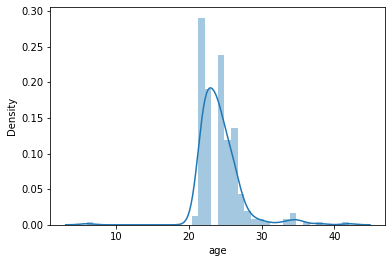

In [53]:
# eliminating the outlier age
ages  = df[df['age'] < 100]['age']
sns.distplot(ages)


Get number of background courses as column

In [54]:
df['taken_information_retrieval_course'] = df['taken_information_retrieval_course'].replace({'1': 'yes', '0': 'no'})
df['taken_statistics_course'] = df['taken_statistics_course'].replace({'mu': 'yes', 'sigma': 'no'})
df['taken_database_course'] = df['taken_database_course'].replace({'ja': 'yes', 'nee': 'no'})

In [55]:
# Create the column of number of background columns
df['background_knowledge'] = df[['taken_machine_learning_course', 'taken_information_retrieval_course', 'taken_statistics_course', 'taken_database_course']].apply(lambda row: row.str.count('yes').sum(), axis=1)

In [56]:
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,gender,have_used_chatgpt,birthdate,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,good_day_1,good_day_2,hour_of_time_to_bed,year_of_birth,age,good_things_1,good_things_2,background_knowledge
0,4-4-2023 12:08:33,Artificial Intelligence,yes,no,yes,no,gender fluid,yes,23/11/1997,319.0,unknown,100.0,0.0,69,11:30,Ashes,Not ashes,11,1997.0,26.0,food,weather,2
1,4-4-2023 12:08:36,Artificial Intelligence,no,no,no,no,male,not willing to say,"5th August, 1995",600.0,no,60.0,2.0,42,23:00,good food,good sleep,23,1995.0,28.0,food,relaxation,0
2,4-4-2023 12:08:38,Artificial Intelligence,no,no,yes,no,female,no,21/09,220.0,no,20.0,5.0,17,23:30,Sports,Friends,23,1999.0,22.0,relaxation,socializing,1
5,4-4-2023 12:08:59,Business Analytics,yes,no,yes,yes,female,yes,13-03-2000,500.0,no,80.0,5.0,13,00:00,Coffee,Sunny weather,0,2000.0,23.0,food,weather,3
6,4-4-2023 12:09:02,Artificial Intelligence,yes,no,yes,yes,male,yes,1999-07-21,150.0,no,100.0,7.0,27,23:00,Good code,Good code,23,1999.0,24.0,productivity,productivity,3


In [57]:
# Drop the original good_day_x columns
df = df.drop(['good_day_1', 'good_day_2', 'birthdate', 'year_of_birth'], axis=1)

In [58]:
# Convert float type columns to int which should be int
df['age'] = df['age'].astype(int)

df['students_in_the_room_gamble'] = df['students_in_the_room_gamble'].astype(int)

df['hours_of_sports_week'] = df['hours_of_sports_week'].astype(int)

In [59]:
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,gender,have_used_chatgpt,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,hour_of_time_to_bed,age,good_things_1,good_things_2,background_knowledge
0,4-4-2023 12:08:33,Artificial Intelligence,yes,no,yes,no,gender fluid,yes,319,unknown,100.0,0,69,11:30,11,26,food,weather,2
1,4-4-2023 12:08:36,Artificial Intelligence,no,no,no,no,male,not willing to say,600,no,60.0,2,42,23:00,23,28,food,relaxation,0
2,4-4-2023 12:08:38,Artificial Intelligence,no,no,yes,no,female,no,220,no,20.0,5,17,23:30,23,22,relaxation,socializing,1
5,4-4-2023 12:08:59,Business Analytics,yes,no,yes,yes,female,yes,500,no,80.0,5,13,00:00,0,23,food,weather,3
6,4-4-2023 12:09:02,Artificial Intelligence,yes,no,yes,yes,male,yes,150,no,100.0,7,27,23:00,23,24,productivity,productivity,3


In [60]:
# Move column background_knowledge to a more appropriate position
column = df.pop('background_knowledge')
new_position = 6
df.insert(new_position, 'background_knowledge', column) 

In [61]:
# Mapping the stress levels to a categorical attribute indicated by 
# low(0-34) , med(35-64), high(65-100)

def _map_stress_to_category(x):

    if x >=0 and  x < 60:
        return 'low'
    # elif x >= 35 and x  < 65:
    #     return 'med'
    else:
        return 'high'

df['stress_level'] = df['stresslevel'].apply(_map_stress_to_category)


<AxesSubplot:xlabel='hour_of_time_to_bed', ylabel='count'>

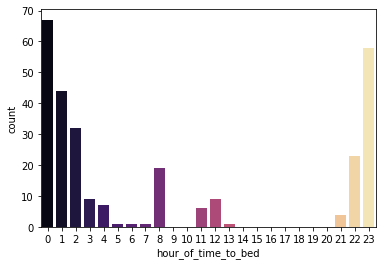

In [62]:
sns.countplot(data=df, x='hour_of_time_to_bed', order=hour_order,palette='magma')

In [63]:
df.head()

,send_date,program,taken_machine_learning_course,taken_information_retrieval_course,taken_statistics_course,taken_database_course,background_knowledge,gender,have_used_chatgpt,students_in_the_room_gamble,stood_up,stresslevel,hours_of_sports_week,random_number,time_to_bed,hour_of_time_to_bed,age,good_things_1,good_things_2,stress_level
0,4-4-2023 12:08:33,Artificial Intelligence,yes,no,yes,no,2,gender fluid,yes,319,unknown,100.0,0,69,11:30,11,26,food,weather,high
1,4-4-2023 12:08:36,Artificial Intelligence,no,no,no,no,0,male,not willing to say,600,no,60.0,2,42,23:00,23,28,food,relaxation,high
2,4-4-2023 12:08:38,Artificial Intelligence,no,no,yes,no,1,female,no,220,no,20.0,5,17,23:30,23,22,relaxation,socializing,low
5,4-4-2023 12:08:59,Business Analytics,yes,no,yes,yes,3,female,yes,500,no,80.0,5,13,00:00,0,23,food,weather,high
6,4-4-2023 12:09:02,Artificial Intelligence,yes,no,yes,yes,3,male,yes,150,no,100.0,7,27,23:00,23,24,productivity,productivity,high


In [64]:
# mapping hour of sleep to categorical 
# 0 - 3 early_midnight
# 4 - 6 early_morning
# 7 - 12 morning
# 13 - 18 afternoon
# 19 - 23 night


def _map_time_to_bed_to_category(x):

    if x >= 0 and x <= 3:
        return "early_midnight"
    elif x >=4 and x <= 7:
        return "early_morning"
    elif x >= 8 and x <= 12:
        return "morning"
    elif x >= 13 and x <= 18:
        return "afternoon"
    else:
        return "night"

df['time_to_bed_category'] = df['hour_of_time_to_bed'].apply(_map_time_to_bed_to_category)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'night'),
  Text(1, 0, 'early_midnight'),
  Text(2, 0, 'early_morning'),
  Text(3, 0, 'morning'),
  Text(4, 0, 'afternoon')])

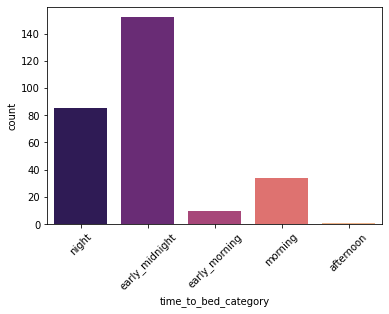

In [65]:
sns.countplot(data=df, x='time_to_bed_category', order=["night", "early_midnight", "early_morning", "morning", "afternoon"],palette='magma')
plt.xticks(rotation=45)


In [66]:
df['age'].median()
df['age'].mean()

27.02482269503546

In [67]:
# As we observe median age , creating a column to indicate if age is leass than 25 to use later during classification task
df['age_less_than_24'] = df['age'].apply(lambda x: 1 if x < 24 else 0)

In [68]:
# merging the good things 1 and good things 2 after one hot ecoding them 

good_things_1_encoded = pd.get_dummies(df['good_things_1'], prefix='good')
good_things_2_encoded = pd.get_dummies(df['good_things_2'], prefix='good')
# add the corresponding columns
encoded_good_things = good_things_1_encoded.add(good_things_2_encoded, axis=1)

# print the resulting dataframe
print(encoded_good_things.columns)

# concatenate the encoded dataframes horizontally
df = pd.concat([encoded_good_things, df], axis=1)

df.columns

Index(['good_drinking', 'good_entertainment', 'good_food',
       'good_physical_exercise', 'good_productivity', 'good_relaxation',
       'good_socializing', 'good_vacation', 'good_weather'],
      dtype='object')


Index(['good_drinking', 'good_entertainment', 'good_food',
       'good_physical_exercise', 'good_productivity', 'good_relaxation',
       'good_socializing', 'good_vacation', 'good_weather', 'send_date',
       'program', 'taken_machine_learning_course',
       'taken_information_retrieval_course', 'taken_statistics_course',
       'taken_database_course', 'background_knowledge', 'gender',
       'have_used_chatgpt', 'students_in_the_room_gamble', 'stood_up',
       'stresslevel', 'hours_of_sports_week', 'random_number', 'time_to_bed',
       'hour_of_time_to_bed', 'age', 'good_things_1', 'good_things_2',
       'stress_level', 'time_to_bed_category', 'age_less_than_24'],
      dtype='object')

In [69]:
good_things = pd.DataFrame(pd.concat([df['good_things_1'], df['good_things_2']], axis=0))
good_things.value_counts()

# As observed we can consider the top 5 good things for analysis to avoid overfitting

weather              137
relaxation           136
food                  94
socializing           93
productivity          49
entertainment         24
physical_exercise     17
drinking               8
vacation               6
dtype: int64

In [70]:
df['program'].value_counts()

Artificial Intelligence               95
Bioinformatics and Systems Biology    50
Business Analytics                    42
Computer Science                      36
Econometrics                          25
Computational Science                 20
Finance                               14
Name: program, dtype: int64

In [71]:
# Merging courses into tech and non tech to simplify analysis and avoid overfitting

def _get_generic_course(x):

    if x == 'Artificial Intelligence' or x == 'Computer Science' or x == 'Business Analytics':
        return 'tech'
    else:
        return 'non_tech'


df['course'] = df['program'].apply(_get_generic_course)
df['course'].value_counts()

tech        173
non_tech    109
Name: course, dtype: int64

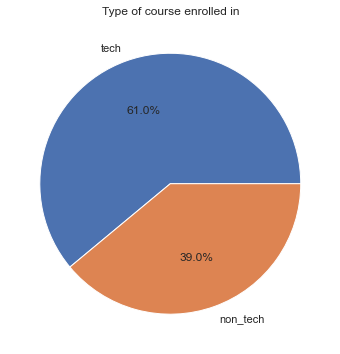

In [72]:
# plot the pie chart
sns.set(style='whitegrid')
plt.figure(figsize=(6,6))
plt.pie(['166', '106'], labels=['tech','non_tech'], autopct='%1.1f%%')
plt.title('Type of course enrolled in')

# show the plot
plt.show()

# TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

## Classifier 1 - Decision Trees

In [73]:
from sklearn.tree import DecisionTreeClassifier,  export_text
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Preparing the data features and target columns 

# One hot encoding the features 

# X -  Features used for training 

# Considering top 5 good things for analysis
features = ['course','taken_machine_learning_course', 'taken_information_retrieval_course', 'taken_statistics_course',
            'taken_database_course','have_used_chatgpt', 'time_to_bed_category' ,
            'good_food', 'good_productivity', 'good_relaxation','good_socializing', 'good_weather', 'age_less_than_24']


# convert the categorical column to numeric values
cols_to_encode = ['course','taken_machine_learning_course', 'taken_information_retrieval_course', 'taken_statistics_course',
         'taken_database_course', 'have_used_chatgpt', 'time_to_bed_category' ]
            
X = df[features]
X = pd.get_dummies(X, columns=cols_to_encode)

y = df['stress_level'].astype('category')


encoding the target stress level using ordinal encoder to retain the order of category , low - 0 and high - 2

In [74]:

# for multi class classification
# oe = OrdinalEncoder(categories = [['low', 'med', 'high']])
# oe = OrdinalEncoder(categories = [['low',  'high']])
# # for multi class classification
# # oe = OrdinalEncoder(categories = [['low', 'med', 'high']])
# oe = OrdinalEncoder(categories = [['low',  'high']])


# # reshape y to have a second dimension
# y = np.array(y).reshape(-1, 1)
# # fit the label encoder to the values and transform them
# y = oe.fit_transform(y)

In [75]:
X.shape

(282, 28)

Splitting the features and target into train and test with ration (70-30)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [77]:
# Training the decision tree

decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(x_train, y_train)

# Testing 
y_pred = decision_tree.predict(x_test)



# Evaluating performance 

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('--------------')
# Print the original labels for comparison
print("Original:", y_test[0:5])
print("Predictions:", y_pred[0:5])

Accuracy: 64.70588235294117
Confusion Matrix:
 [[ 7 25]
 [ 5 48]]
--------------
Original: 129    low
71     low
101    low
220    low
296    low
Name: stress_level, dtype: category
Categories (2, object): ['high', 'low']
Predictions: ['low' 'high' 'low' 'low' 'low']


In [79]:
# Convert the ordinal encoded predictions back into their original labels
# y_pred_labels = oe.inverse_transform(y_pred.reshape(-1, 1))

# Print the original labels for comparison
# print("Original:", y_test)
# print("Predictions:", y_pred)
# print("Decoded Predictions:", y_pred_labels)

              precision    recall  f1-score   support

        high       0.58      0.22      0.32        32
         low       0.66      0.91      0.76        53

    accuracy                           0.65        85
   macro avg       0.62      0.56      0.54        85
weighted avg       0.63      0.65      0.59        85



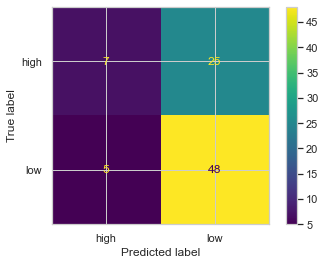

In [80]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()
plt.show()

In [81]:
# Print the decision tree
tree_rules = export_text(decision_tree, feature_names=X.columns.tolist())
print(tree_rules)

|--- good_productivity <= 0.50
|   |--- good_food <= 0.50
|   |   |--- have_used_chatgpt_no <= 0.50
|   |   |   |--- taken_information_retrieval_course_unknown <= 0.50
|   |   |   |   |--- class: low
|   |   |   |--- taken_information_retrieval_course_unknown >  0.50
|   |   |   |   |--- class: high
|   |   |--- have_used_chatgpt_no >  0.50
|   |   |   |--- taken_database_course_no <= 0.50
|   |   |   |   |--- class: low
|   |   |   |--- taken_database_course_no >  0.50
|   |   |   |   |--- class: low
|   |--- good_food >  0.50
|   |   |--- have_used_chatgpt_not willing to say <= 0.50
|   |   |   |--- age_less_than_24 <= 0.50
|   |   |   |   |--- class: low
|   |   |   |--- age_less_than_24 >  0.50
|   |   |   |   |--- class: high
|   |   |--- have_used_chatgpt_not willing to say >  0.50
|   |   |   |--- good_weather <= 0.50
|   |   |   |   |--- class: high
|   |   |   |--- good_weather >  0.50
|   |   |   |   |--- class: low
|--- good_productivity >  0.50
|   |--- taken_information_re

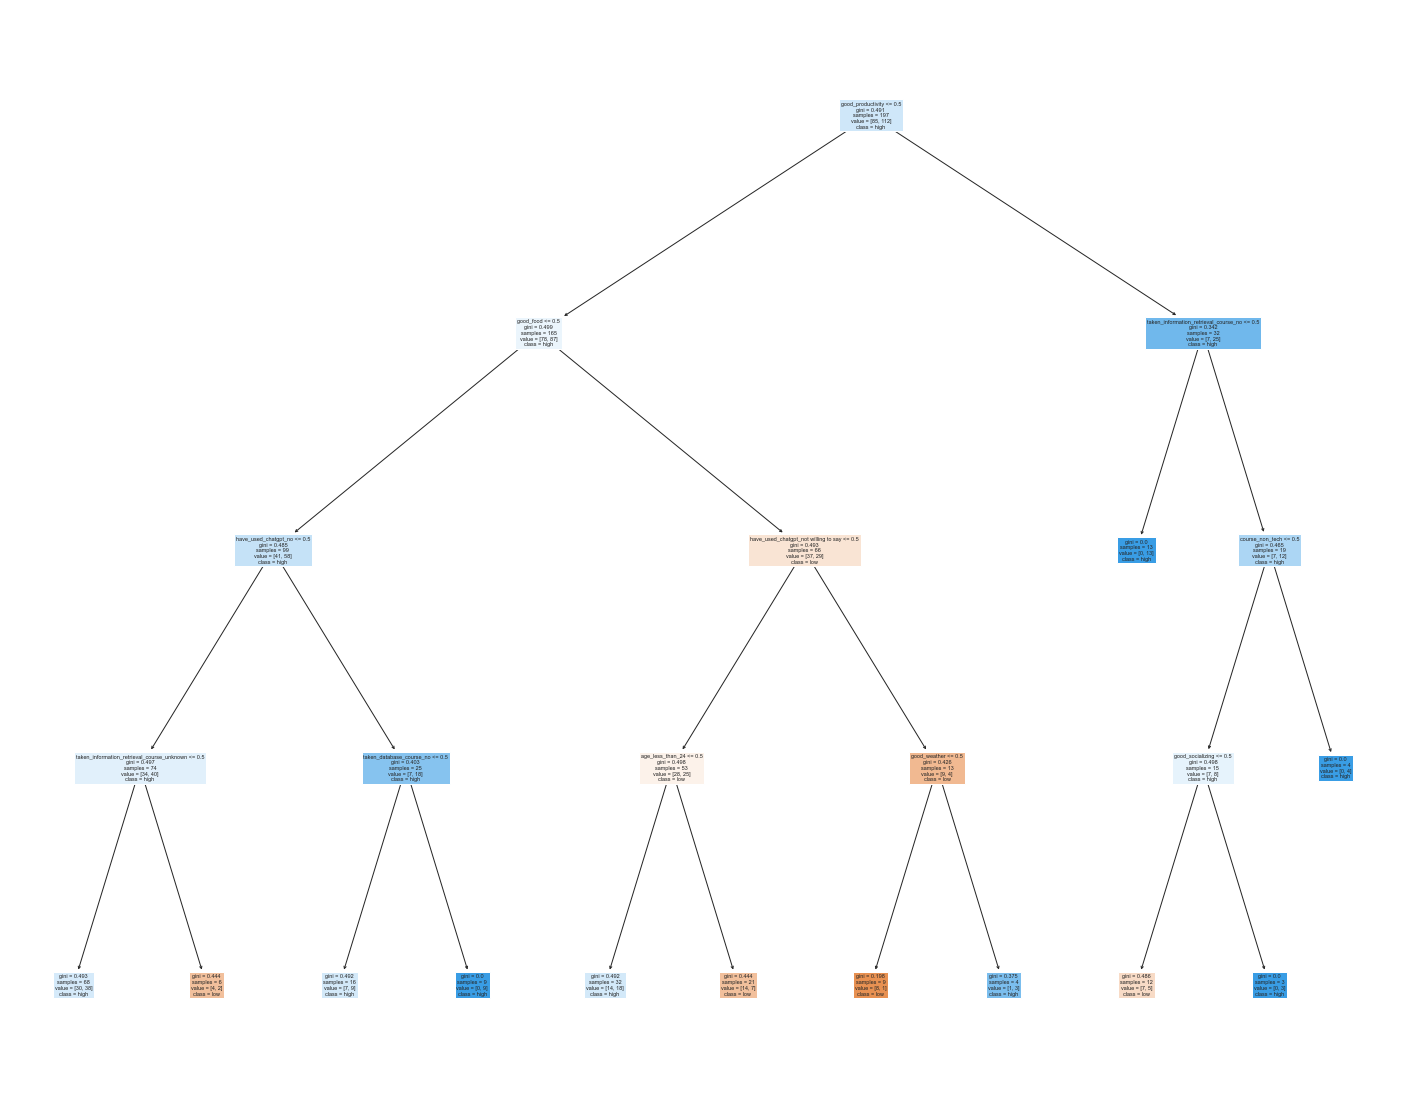

In [82]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=X.columns.tolist(),  
                   class_names=['low','high'],
                   filled=True)

### Classifier 2 - Random Forest 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# create a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

# train the model on the training data
rfc.fit(x_train, y_train)

# predict labels for the test data
y_pred = rfc.predict(x_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:  {accuracy*100}")


Accuracy:  61.1764705882353


## Feature importance

Feature ranking:
good_relaxation : 0.08141416513609598
good_food : 0.07272373033829133
age_less_than_24 : 0.07185810533225793
good_socializing : 0.06267498897039259
good_weather : 0.056628348569709955
good_productivity : 0.05470270503042801
time_to_bed_category_night : 0.0448401097216639
taken_information_retrieval_course_no : 0.04376270980937662
time_to_bed_category_early_midnight : 0.04096675412338189
have_used_chatgpt_yes : 0.03981868214130154
taken_information_retrieval_course_yes : 0.03972728869198551
taken_database_course_yes : 0.03583369514399253
taken_database_course_no : 0.03546799970379445
have_used_chatgpt_no : 0.03542685932218517
course_non_tech : 0.035206741778571846
course_tech : 0.03300652945961773
time_to_bed_category_morning : 0.032213496482616476
have_used_chatgpt_not willing to say : 0.028470985128242948
taken_machine_learning_course_yes : 0.0283055197611252
taken_machine_learning_course_no : 0.027438052680670323
taken_information_retrieval_course_unknown : 0.0252680

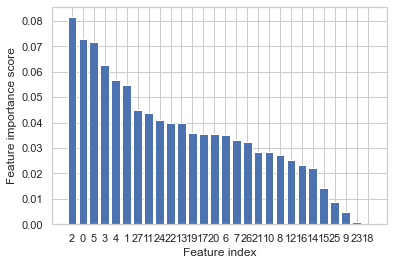

In [84]:
# get feature importance scores
importances = rfc.feature_importances_

# sort feature importance scores in descending order
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
feature_names = X.columns.tolist()

# print the feature ranking
print("Feature ranking:")
for i in range(len(importances)):
    print(f"{feature_names[indices[i]]} : {importances[indices[i]]}")

# plot feature importances
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature index")
plt.ylabel("Feature importance score")
plt.show()